<a href="https://colab.research.google.com/github/pouria98sarmasti/Project1_ChatBot-with-UI/blob/master/Demo_ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#initialization

###run ollama in colab

In [1]:
! sudo apt-get install -y pciutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 2s (195 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initializ

In [2]:
! curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13269    0 13269    0     0  35432      0 --:--:-- --:--:-- --:--:-- 35478
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [3]:
import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

In [4]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [5]:
!ollama run hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf

pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠏ pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB                  pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB                  pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB                  pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB                  pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB                  pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB                  pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB                  pulling manifest 
pulling 5d08ae077cba...   0% ▕▏    0 B/5.7 GB         

In [6]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

###install python packages

In [1]:
!touch requirements.txt

In [2]:
!echo -e "openai\nollama\ngradio\nlangchain\nlanggraph\nlangchain-community\nlangchain-openai\nlangchain-huggingface\nfaiss-cpu\nfaiss-gpu\nstreamlit\ntransformers" > requirements.txt
!echo -e "\nhuggingface-hub\nhazm\nscipy\nnltk\ngensim\nsentence-transformers\npyngrok\nPyPDF2[crypto]\nPyPDF2\npypdf\npypdf[crypto]\ndocx2txt\nvllm" >> requirements.txt

In [3]:
!pip install -r requirements.txt

In [4]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
up to date, audited 23 packages in 1s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠼

###connect to ollama server

In [31]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [32]:
!ollama -v

ollama version is 0.5.4


###make gguf format runable in colab

In [5]:
! pip install transformers trl py7zr optimum accelerate bitsandbytes
! pip install git+https://github.com/huggingface/peft
! pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu122

  Using cached trl-0.13.0-py3-none-any.whl.metadata (11 kB)
  Using cached py7zr-0.22.0-py3-none-any.whl.metadata (16 kB)
  Using cached optimum-1.23.3-py3-none-any.whl.metadata (20 kB)
  Using cached bitsandbytes-0.45.0-py3-none-manylinux_2_24_x86_64.whl.metadata (2.9 kB)
  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached pycryptodomex-3.21.0-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached pyzstd-0.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.4 kB)
  Using cached pyppmd-1.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
  Using cached pybcj-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached multivolumefile-0.2.3-py3-none-any.whl.metadata (6.3 kB)
  Using cached inflate64-1.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.meta

###connect to ollama with openai api

In [127]:
openai_api_key = 'ollama'
BASE_URL = 'http://localhost:11434/v1/'

In [192]:
openai_kwargs = {'openai_api_key': openai_api_key,
                 'base_url': BASE_URL,
                 'max_tokens': 500,
                 'model': 'hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf',
                 'temperature': 0}

###better printing options

In [44]:
from pprint import pprint
from rich import print as print_rich

#Start

###step 1:
QA data: load, prepare

create a vectorDB

In [19]:
from datasets import load_dataset
from langchain_core.documents import Document
from langchain_community.vectorstores.faiss import FAISS
from langchain_huggingface.embeddings.huggingface import HuggingFaceEmbeddings

embedding_e5 = HuggingFaceEmbeddings(
                            model_name="heydariAI/persian-embeddings",
                            model_kwargs={'device': 'cuda'},
                            encode_kwargs={'normalize_embeddings': False}
                            )

drugQA = load_dataset("amirmmahdavikia/darooyab_qa", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [20]:
def remove_rows_with_no_question(example):
  return example['question'] is not None

drugQA_removedRows_withNoQuestion = drugQA.filter(remove_rows_with_no_question)

In [21]:
from hazm import InformalNormalizer, Normalizer

normalizer = Normalizer()
informal_normalizer = InformalNormalizer()



def normalize_text(example):

  normalized_question = normalizer.normalize(example["question"])
  normalized_answer = normalizer.normalize(example["answer"])

  return {"question": normalized_question,
          "answer": normalized_answer}


# drugQA_normalized = drugQA_removedRows_withNoQuestion.map(normalize_text, batched=True)  #### batched=True not working
drugQA_normalized = drugQA_removedRows_withNoQuestion.map(normalize_text)

In [25]:
print_rich(drugQA_normalized['answer'][0])
print_rich(drugQA_removedRows_withNoQuestion['answer'][0])

آدالیمومب یک مونوکلونال آنتی بادی نوترکیب است که به فاکتور نکروز توموری آلفا (TNF-alpha) متصل شده و در نتیجه مانع 
از اتصال آن به رسپتور TNF-alpha می‌شود و پروسه‌های التهابی سایتوکاینی را مهار می‌نماید. افزایش سطح TNF در مایع 
سینوویال در درد پاتولوژیک و آسیب مفصلی در آرتریت اثر دارد. آدالیمومب علائم و نشانه‌های آرتریت پسوریاتیک، روماتوئید 
آرتریت و اسپاندیلیت انکیلوزان را کاهش می‌دهد. مانع از پیشرفت آسیب ساختاری آرتریت روماتوئید و پسوریاتیک می‌شود. علائم
و نشانه‌های بیماری Crohn و کولیت اولسراتیو را کم می‌کند؛ از افزایش ضخامت اپیدرم و اینفیلتراسیون سلولی در پسوریازیس 
جلوگیری می‌کند.

آدالیمومب یک مونوکلونال آنتی بادی نوترکیب است که به فاکتور نکروز توموری آلفا (TNF-alpha) متصل شده و در نتیجه مانع 
از اتصال آن به رسپتور TNF-alpha می شود و پروسه های التهابی سایتوکاینی را مهار می نماید. افزایش سطح TNF در مایع 
سینوویال در درد پاتولوژیک و آسیب مفصلی در آرتریت اثر دارد. آدالیمومب علائم و نشانه های آرتریت پسوریاتیک، روماتوئید 
آرتریت و اسپاندیلیت انکیلوزان را کاهش می دهد. مانع از پیشرفت آسیب ساختاری آرتریت روماتوئید و پسوریاتیک می شود. 
علائم و نشانه های بیماری Crohn و کولیت اولسراتیو را کم می کند؛ از افزایش ضخامت اپیدرم و اینفیلتراسیون سلولی در 
پسوریازیس جلوگیری می کند.

In [26]:
document_drugQA = [ Document(page_content=qa["question"], metadata={"answer": qa["answer"]})\
 for qa in drugQA_normalized]

vectorDB_faiss_drugQA = FAISS.from_documents(document_drugQA, embedding_e5)

In [27]:
out1 = vectorDB_faiss_drugQA.similarity_search("خواص دارویی استامینوفن را بگو ببینم؟", k=1)

In [28]:
len(out1)

1

In [29]:
print_rich(out1[0].metadata["answer"])

مصرف بیش از ۵ نوبت در روز کودکان توصیه نمی‌شود، مگر اینکه طبق دستور پزشک باشد. ۲. به دلیل احتمال بروز آسیب کبدی یا 
کلیوی، این دارو نباید بیش از مقدار توصیه‌شده مصرف شود.

###step 2: model
chat model

sentiment model

In [193]:
from langchain_openai.chat_models.base import ChatOpenAI
chat_model = ChatOpenAI(**openai_kwargs)

In [ ]:
# not working due to exponencialy ram usage whe nde-quantizing
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_huggingface.llms.huggingface_pipeline import HuggingFacePipeline
from langchain_huggingface.chat_models.huggingface import ChatHuggingFace

model_id = "tensorblock/AVA-Llama-3-V2-GGUF"
filename = "AVA-Llama-3-V2-Q5_0.gguf"

tokenizer = AutoTokenizer.from_pretrained(model_id, gguf_file=filename, legacy=False)
model = AutoModelForCausalLM.from_pretrained(model_id, gguf_file=filename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Converting and de-quantizing GGUF tensors...:  24%|██▍       | 70/291 [00:38<01:44,  2.11it/s]

In [ ]:
pipe = pipeline(
    "text-generation", model=model, tokenizer=tokenizer, max_new_tokens=500, temperature=0.7, do_sample=True,
)
llm = HuggingFacePipeline(pipeline=pipe)

chat_model = ChatHuggingFace(llm)

###step 3: workflow
add history to chat model

In [209]:
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langgraph.graph import START, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from typing import Sequence
from typing_extensions import Annotated, TypedDict


# from langgraph.graph import START, MessagesState, StateGraph


promptTemplate_system = """
1. You are a QA chatbot, that answer drug related questions.
2. Always answer in {language}.
3. A similar question and its answer will be provided for you. Consider this extra information for answering  question.
4. just answer the question. not even a word more.
"""

promptTemplate_rag = """
question: {user_question}
simillar question: {retrived_similar_question}
answer of simillar question: {retrived_similar_answer}
"""
promptTemplate_rag = PromptTemplate.from_template(promptTemplate_rag)


chatPromptTemplate = ChatPromptTemplate([
    ("system", promptTemplate_system),
    ("placeholder", "{conversation}"), # or use: MessagesPlaceholder(variable_name="conversation", optional=True)
])

class State(TypedDict):
    language: str
    user_question: str
    retrived_similar_question: str
    retrived_similar_answer: str
    answer_to_user_questoin: str
    conversation: Annotated[Sequence[BaseMessage], add_messages]

def add_userQuestion_to_conversation(state: State):
  return {"conversation": [("human", state["user_question"])]}


def retrieve(state: State):
  retrived_QA = vectorDB_faiss_drugQA.similarity_search(state["user_question"], k=1)
  return {"retrived_similar_question": retrived_QA[0].page_content, "retrived_similar_answer": retrived_QA[0].metadata["answer"]}


def generate(state: State):
  prompt_rag = promptTemplate_rag.format(user_question=state["user_question"],
                                                     retrived_similar_question=state["retrived_similar_question"],
                                                     retrived_similar_answer=state["retrived_similar_answer"],
                                         )
  prompt_chat = chatPromptTemplate.format(language=state["language"], conversation=(state["conversation"][:-1]+[("human", prompt_rag)]))

  response = chat_model.invoke(prompt_chat)
  return {"answer_to_user_questoin": response.content,
          "conversation": [response]}


chatBot_app_builder = StateGraph(state_schema=State).add_sequence([add_userQuestion_to_conversation, retrieve, generate])
chatBot_app_builder.add_edge(START, "add_userQuestion_to_conversation")


memory = MemorySaver()
chatBot_app = chatBot_app_builder.compile(checkpointer=memory)

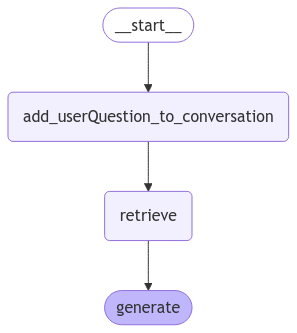

In [210]:
from IPython.display import Image, display

display(Image(chatBot_app.get_graph().draw_mermaid_png()))

In [211]:
input_dict = {"user_question": "خواص استامینیفون را بگو؟",
              "language": "persian"}
config_user_1 = {"configurable": {"thread_id": "abc123"}} # thred_id identify new chat


output = chatBot_app.invoke(input_dict, config_user_1)

pprint(output)

{'answer_to_user_questoin': 'استامینوفن یک داروی ضد درد و تب\u200cبر است که '
                            'خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.',
 'conversation': [HumanMessage(content='خواص استامینیفون را بگو؟', additional_kwargs={}, response_metadata={}, id='4b0c57e0-1293-4996-94f5-6a1ee4f5ad8f'),
                  AIMessage(content='استامینوفن یک داروی ضد درد و تب\u200cبر است که خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 168, 'total_tokens': 199, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf', 'system_fingerprint': 'fp_ollama', 'finish_reason': 'stop', 'logprobs': None}, id='run-f4177a93-5007-4770-86e9-758911df854f-0', usage_metadata={'input_tokens': 168, 'output_tokens': 31, 'total_tokens': 199, 'input_token_details': {}, 'output_token_details': {}})],


In [212]:
print(output["conversation"][-1].content)

استامینوفن یک داروی ضد درد و تب‌بر است که خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.


In [213]:
input_dict = {"user_question": "تعبیر خواب بلدی؟"}
config_user_1 = {"configurable": {"thread_id": "abc123"}} # thred_id identify new chat


output = chatBot_app.invoke(input_dict, config_user_1)

pprint(output)

{'answer_to_user_questoin': 'خواب، تعبیر خواب، آلپرازولام، اضطراب، استرس، بی '
                            'خوابی، تحمل دارو، وابستگی به دارو، مسمومیت '
                            'ناخواسته دارویی، خواب کم\u200cعمق، کیفیت استراحت.',
 'conversation': [HumanMessage(content='خواص استامینیفون را بگو؟', additional_kwargs={}, response_metadata={}, id='4b0c57e0-1293-4996-94f5-6a1ee4f5ad8f'),
                  AIMessage(content='استامینوفن یک داروی ضد درد و تب\u200cبر است که خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 168, 'total_tokens': 199, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf', 'system_fingerprint': 'fp_ollama', 'finish_reason': 'stop', 'logprobs': None}, id='run-f4177a93-5007-4770-86e9-758911df854f-0', usage_metadata={'input_tokens': 168, 'output_tokens': 31, 't

In [214]:
print(output["conversation"][-1].content)

خواب، تعبیر خواب، آلپرازولام، اضطراب، استرس، بی خوابی، تحمل دارو، وابستگی به دارو، مسمومیت ناخواسته دارویی، خواب کم‌عمق، کیفیت استراحت.


In [215]:
input_dict = {"user_question": "آیا من قبلا این سوال را از تو پرسیده ام: خواص استامینیفون؟",
              "language": "persian"}
config_user_1 = {"configurable": {"thread_id": "abc123"}} # thred_id identify new chat


output = chatBot_app.invoke(input_dict, config_user_1)

pprint(output)

{'answer_to_user_questoin': 'بله، قبلاً این سوال را از من پرسیده اید: خواص '
                            'استامینیفون. پاسخ مشابه: استامینوفن یک داروی ضد '
                            'درد و تب\u200cبر است که مکانیسم اثر آن بر روی '
                            'سیستم عصبی مرکزی و همچنین سیستم گوارشی است.',
 'conversation': [HumanMessage(content='خواص استامینیفون را بگو؟', additional_kwargs={}, response_metadata={}, id='4b0c57e0-1293-4996-94f5-6a1ee4f5ad8f'),
                  AIMessage(content='استامینوفن یک داروی ضد درد و تب\u200cبر است که خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 168, 'total_tokens': 199, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf', 'system_fingerprint': 'fp_ollama', 'finish_reason': 'stop', 'logprobs': None}, id='run-f4177a93-5007-4770-86e9-758

In [216]:
print(output["conversation"][-1].content)

بله، قبلاً این سوال را از من پرسیده اید: خواص استامینیفون. پاسخ مشابه: استامینوفن یک داروی ضد درد و تب‌بر است که مکانیسم اثر آن بر روی سیستم عصبی مرکزی و همچنین سیستم گوارشی است.


In [217]:
input_dict = {"user_question": "اسم من پوریا است.؟",
              "language": "persian"}
config_user_1 = {"configurable": {"thread_id": "abc123"}} # thred_id identify new chat


output = chatBot_app.invoke(input_dict, config_user_1)

pprint(output)

{'answer_to_user_questoin': 'پوریا، من نمی\u200cتوانم پاسخی برای سوال شما پیدا '
                            'کنم.',
 'conversation': [HumanMessage(content='خواص استامینیفون را بگو؟', additional_kwargs={}, response_metadata={}, id='4b0c57e0-1293-4996-94f5-6a1ee4f5ad8f'),
                  AIMessage(content='استامینوفن یک داروی ضد درد و تب\u200cبر است که خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 168, 'total_tokens': 199, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf', 'system_fingerprint': 'fp_ollama', 'finish_reason': 'stop', 'logprobs': None}, id='run-f4177a93-5007-4770-86e9-758911df854f-0', usage_metadata={'input_tokens': 168, 'output_tokens': 31, 'total_tokens': 199, 'input_token_details': {}, 'output_token_details': {}}),
                  HumanMessage(content='ت

In [218]:
print(output["conversation"][-1].content)

پوریا، من نمی‌توانم پاسخی برای سوال شما پیدا کنم.


In [219]:
input_dict = {"user_question": "اسم من چیست؟",
              "language": "persian"}
config_user_1 = {"configurable": {"thread_id": "abc123"}} # thred_id identify new chat


output = chatBot_app.invoke(input_dict, config_user_1)

pprint(output)

{'answer_to_user_questoin': 'پوریا من نمی\u200cتوانم پاسخی برای سوال شما پیدا '
                            'کنم.',
 'conversation': [HumanMessage(content='خواص استامینیفون را بگو؟', additional_kwargs={}, response_metadata={}, id='4b0c57e0-1293-4996-94f5-6a1ee4f5ad8f'),
                  AIMessage(content='استامینوفن یک داروی ضد درد و تب\u200cبر است که خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 168, 'total_tokens': 199, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf', 'system_fingerprint': 'fp_ollama', 'finish_reason': 'stop', 'logprobs': None}, id='run-f4177a93-5007-4770-86e9-758911df854f-0', usage_metadata={'input_tokens': 168, 'output_tokens': 31, 'total_tokens': 199, 'input_token_details': {}, 'output_token_details': {}}),
                  HumanMessage(content='تع

In [220]:
print(output["conversation"][-1].content)

پوریا من نمی‌توانم پاسخی برای سوال شما پیدا کنم.


In [221]:
input_dict = {"user_question": "کاربرد لووتیروکسین سدیم؟",
              "language": "persian"}
config_user_1 = {"configurable": {"thread_id": "abc123"}} # thred_id identify new chat


output = chatBot_app.invoke(input_dict, config_user_1)

pprint(output)

{'answer_to_user_questoin': 'کاربرد لووتیروکسین سدیم برای تشخیص و درمان '
                            'کم\u200cکاری تیروئید، پیشگیری و درمان گواتر و '
                            'بررسی عملکرد تیروئید است.',
 'conversation': [HumanMessage(content='خواص استامینیفون را بگو؟', additional_kwargs={}, response_metadata={}, id='4b0c57e0-1293-4996-94f5-6a1ee4f5ad8f'),
                  AIMessage(content='استامینوفن یک داروی ضد درد و تب\u200cبر است که خواص آن شامل کاهش تب، کاهش درد و کاهش تورم است.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 168, 'total_tokens': 199, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'hf.co/tensorblock/AVA-Llama-3-V2-GGUF:AVA-Llama-3-V2-Q5_K_M.gguf', 'system_fingerprint': 'fp_ollama', 'finish_reason': 'stop', 'logprobs': None}, id='run-f4177a93-5007-4770-86e9-758911df854f-0', usage_metadata={'input_tokens': 168, 'output_tokens': 31, 'total_tokens': 199, 'input_

In [222]:
print(output["conversation"][-1].content)

کاربرد لووتیروکسین سدیم برای تشخیص و درمان کم‌کاری تیروئید، پیشگیری و درمان گواتر و بررسی عملکرد تیروئید است.


###step 4: inference
vLLM